In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import standardised_pipeline_utils
#The joblib library is used for efficient saving and loading of Python objects.

# Save / dump models or data to/from a file
from joblib import dump, load

### Removing nan's - transcriptomics

In [ ]:
transcriptomics_processed = load('data/transcriptomics.joblib')

In [ ]:
transcriptomics_processed.T.isna().sum()
# all the nan's (582) are in the same row (cell line)

Unnamed: 0
LC1SQSF_LUNG                                    0
COGAR359_SOFT_TISSUE                            0
COLO794_SKIN                                    0
KKU213_BILIARY_TRACT                            0
RT4_URINARY_TRACT                               0
                                             ... 
TOLEDO_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE       0
SSP25_BILIARY_TRACT                             0
ECC2_BILIARY_TRACT                              0
A673_BONE                                       0
TT_OESOPHAGUS                                4020
Length: 1376, dtype: int64

In [ ]:
transcriptomics_processed.drop(index="TT_OESOPHAGUS", inplace=True)
# removed row with nan's. no more nan's in RNA data.

In [ ]:
transcriptomics_processed.shape

(1375, 51989)

In [ ]:
dump(transcriptomics_processed, "data/transcriptomics.joblib")

['data/transcriptomics.joblib']

### Removing nan's - proteomics

In [ ]:
proteomics_processed = load("data/proteomics.joblib")

In [ ]:
proteomics_processed.shape

(375, 7372)

In [ ]:
proteomics_processed.isna().any().sum()

2259

In [ ]:
proteomics_processed = proteomics_processed.dropna(axis=1)

In [ ]:
proteomics_processed.shape

(375, 5113)

In [ ]:
dump(proteomics_processed, "data/proteomics.joblib")

['data/proteomics.joblib']

### Re-match no-nan data

In [ ]:
transcriptomics_processed = load("data/transcriptomics.joblib")
proteomics_processed = load("data/proteomics.joblib")

In [ ]:
indices = list(load("data/transcriptomics_matched.joblib").index)

In [ ]:
transcriptomics_matched = transcriptomics_processed.reindex(indices)
proteomics_matched = proteomics_processed.reindex(indices)

In [ ]:
transcriptomics_matched.shape, proteomics_matched.shape

((369, 51989), (369, 5113))

In [ ]:
dump(transcriptomics_matched, "data/transcriptomics_matched.joblib")
dump(proteomics_matched, "data/proteomics_matched.joblib")

['data/proteomics_matched.joblib']

### Unexpressed genes removal

In [ ]:
transcriptomics = load("data/transcriptomics_matched.joblib")
proteomics = load("data/proteomics_matched.joblib")

In [ ]:
# Removing unexpressed genes from transcriptomics
# Removing genes with summed expression below 0.5

transcriptomics = transcriptomics.loc[:, transcriptomics.sum() >= 0.5]

In [ ]:
dump(transcriptomics, "data/transcriptomics_matched.joblib")

['data/transcriptomics_matched.joblib']

### LogLog data

In [ ]:
transcriptomics = load("data/transcriptomics_matched.joblib")
proteomics = load("data/proteomics_matched.joblib")

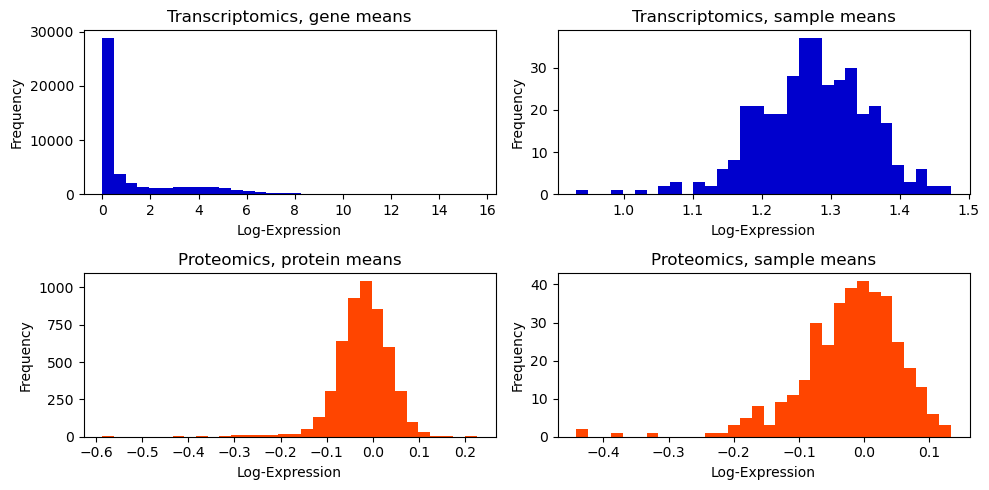

In [ ]:
data1 = transcriptomics.mean()
data2 = transcriptomics.T.mean()
data3 = proteomics.mean()
data4 = proteomics.T.mean()

# Set up the subplot grid (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Plot histograms
data1.plot(kind='hist', bins=32, ax=axes[0, 0], color='mediumblue', title='Transcriptomics, gene means')
data2.plot(kind='hist', bins=32, ax=axes[0, 1], color='mediumblue', title='Transcriptomics, sample means')
data3.plot(kind='hist', bins=32, ax=axes[1, 0], color='orangered', title='Proteomics, protein means')
data4.plot(kind='hist', bins=32, ax=axes[1, 1], color='orangered', title='Proteomics, sample means')

# Set common labels
for ax in axes.flat:
    ax.set_xlabel('Log-Expression')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
# Results: gene averages still aren't bell shaped in transcriptomics data

In [ ]:
# Applying another log-transformation

transcriptomics = np.log2(1000 * transcriptomics + 1)

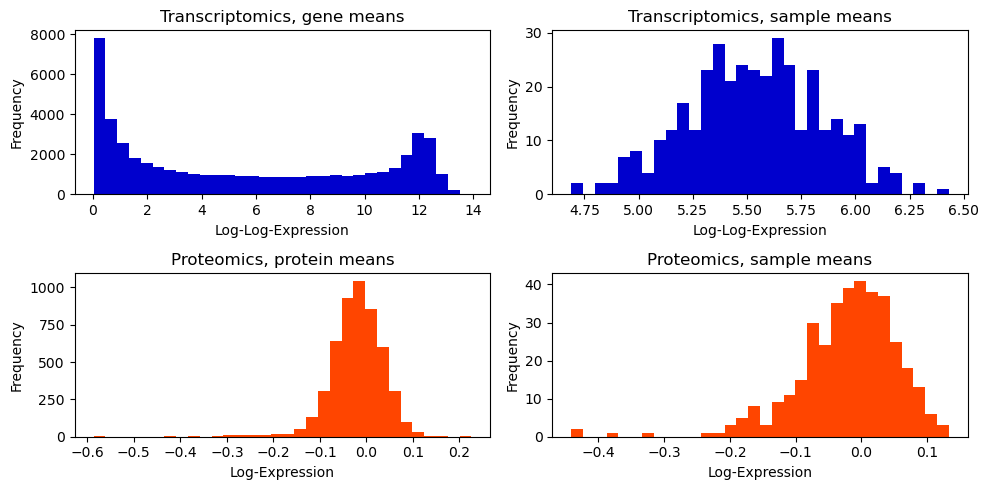

In [ ]:
data1 = transcriptomics.mean()
data2 = transcriptomics.T.mean()
data3 = proteomics.mean()
data4 = proteomics.T.mean()

# Set up the subplot grid (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Plot histograms
data1.plot(kind='hist', bins=32, ax=axes[0, 0], color='mediumblue', title='Transcriptomics, gene means')
data2.plot(kind='hist', bins=32, ax=axes[0, 1], color='mediumblue', title='Transcriptomics, sample means')
data3.plot(kind='hist', bins=32, ax=axes[1, 0], color='orangered', title='Proteomics, protein means')
data4.plot(kind='hist', bins=32, ax=axes[1, 1], color='orangered', title='Proteomics, sample means')

# Set common labels
for ax in axes.flat:
    ax.set_xlabel('Log-Expression')
    ax.set_ylabel('Frequency')

axes[0,0].set_xlabel('Log-Log-Expression')
axes[0,1].set_xlabel('Log-Log-Expression')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
dump(transcriptomics, "data/transcriptomics_loglog_matched.joblib")

['data/transcriptomics_loglog_matched.joblib']

In [ ]:
transcriptomics.columns

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS1',
       'A2MP1', 'A3GALT2', 'A4GALT',
       ...
       'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11AP1', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=47479)